# Nationwide Customer Profile Analysis

In [141]:
# Imports
import os
import requests
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import plotly.express as px

In [139]:
# Read the Census API Key
load_dotenv()
CENSUS_API_KEY = os.getenv("census")
map_box_api = os.getenv("mapbox")

In [20]:
# Census URL
census_url = 'https://api.census.gov/data/2019/acs/acs1/subject?get=NAME,S0102_C01_028E,S0102_C02_076E,S0601_C03_006E,S0601_C03_035E,S0601_C03_036E,S0601_C03_037E&for=county:*&key=' + CENSUS_API_KEY

In [37]:
# Fetiching Required Census data from an API
res_data = requests.get(census_url).json()

In [38]:
# Convert the Census Data into a DataFrame
census_data = pd.DataFrame(res_data[1:], columns=res_data[0])
census_data.head()

,NAME,S0102_C01_028E,S0102_C02_076E,S0601_C03_006E,S0601_C03_035E,S0601_C03_036E,S0601_C03_037E,state,county
0,"Jefferson County, Kentucky",44.1,64495,13.2,30.3,25.5,18.6,21,111
1,"Hennepin County, Minnesota",47.1,85434,15.0,24.8,35.9,23.8,27,053
2,"Olmsted County, Minnesota",None,None,12.8,23.8,29.0,30.7,27,109
3,"Scott County, Minnesota",None,None,22.3,28.8,39.3,15.8,27,139
4,"Faulkner County, Arkansas",None,None,14.8,35.1,21.0,9.5,05,045


In [39]:
# Split the NAME column into County and State
census_data[['County', 'State']] = census_data['NAME'].str.split(',', 1, expand=True)
census_data['County'] = census_data['County'].str.split(expand=True)

# Drop the NAME Column
census_data.drop(columns='NAME', inplace=True)
census_data.head()

,S0102_C01_028E,S0102_C02_076E,S0601_C03_006E,S0601_C03_035E,S0601_C03_036E,S0601_C03_037E,state,county,County,State
0,44.1,64495,13.2,30.3,25.5,18.6,21,111,Jefferson,Kentucky
1,47.1,85434,15.0,24.8,35.9,23.8,27,053,Hennepin,Minnesota
2,None,None,12.8,23.8,29.0,30.7,27,109,Olmsted,Minnesota
3,None,None,22.3,28.8,39.3,15.8,27,139,Scott,Minnesota
4,None,None,14.8,35.1,21.0,9.5,05,045,Faulkner,Arkansas


In [40]:
# Education Count Column = All the College Degree +  Bachelor Degree + professional Degree Population
census_data['Education_Pop'] = census_data['S0601_C03_035E'].astype(np.float) + census_data['S0601_C03_036E'].astype(np.float) + census_data['S0601_C03_037E'].astype(np.float)
census_data.drop(columns=['S0601_C03_035E','S0601_C03_036E','S0601_C03_037E'], inplace=True)
census_data.head()

,S0102_C01_028E,S0102_C02_076E,S0601_C03_006E,state,county,County,State,Education_Pop
0,44.1,64495,13.2,21,111,Jefferson,Kentucky,74.4
1,47.1,85434,15.0,27,053,Hennepin,Minnesota,84.5
2,None,None,12.8,27,109,Olmsted,Minnesota,83.5
3,None,None,22.3,27,139,Scott,Minnesota,83.9
4,None,None,14.8,05,045,Faulkner,Arkansas,65.6


In [42]:
# Defining each column with Meaningfull data definition
census_data.rename(columns={
    'S0102_C01_028E': 'Marital_Pop',
    'S0102_C02_076E': 'Income',
    'S0601_C03_006E': 'Age_Pop',
    'state': 'State_code',
    'county': 'County_code'
}, inplace=True)
census_data.head()

,Marital_Pop,Income,Age_Pop,State_code,County_code,County,State,Education_Pop
0,44.1,64495,13.2,21,111,Jefferson,Kentucky,74.4
1,47.1,85434,15.0,27,053,Hennepin,Minnesota,84.5
2,None,None,12.8,27,109,Olmsted,Minnesota,83.5
3,None,None,22.3,27,139,Scott,Minnesota,83.9
4,None,None,14.8,05,045,Faulkner,Arkansas,65.6


In [43]:
# dropping all the None values
census_data.dropna(inplace=True)

In [44]:
# Remove all the duplicates
census_data.drop_duplicates(inplace=True)

In [45]:
# inspecting Data Types
census_data.dtypes

Marital_Pop       object
Income            object
Age_Pop           object
State_code        object
County_code       object
County            object
State             object
Education_Pop    float64
dtype: object

In [46]:
# Converting String Numeric columns to Numeric
census_data['Marital_Pop'] = census_data['Marital_Pop'].astype(np.float)
census_data['Income'] = census_data['Income'].astype(np.int)
census_data['Age_Pop'] = census_data['Age_Pop'].astype(np.float)
census_data['State_code'] = census_data['State_code'].astype(np.int)
census_data['County_code'] = census_data['County_code'].astype(np.int)
census_data['Education_Pop'] = census_data['Education_Pop'].astype(np.float)

In [47]:
# Checking a sample of census_data
census_data.head()

,Marital_Pop,Income,Age_Pop,State_code,County_code,County,State,Education_Pop
0,44.1,64495,13.2,21,111,Jefferson,Kentucky,74.4
1,47.1,85434,15.0,27,53,Hennepin,Minnesota,84.5
6,48.6,57972,13.7,20,173,Sedgwick,Kansas,68.0
9,45.7,80766,11.4,42,3,Allegheny,Pennsylvania,82.0
14,54.8,104728,16.0,42,29,Chester,Pennsylvania,84.0


- - -

## States and Countys which are (60K-80K) Income, (40 - 60) Age, Educated and Married

In [155]:
def geo_coordinates(df):
    # Geolocator object
    geolocator = Nominatim(user_agent="http")
    Lat_list, Long_list = [], []
    
    # Iterate eah rows and get County and State and passing to geolocator
    for i, row in df[['County','State']].iterrows():
        coordinates = geolocator.geocode(f"{row['County']}, {row['State']}")
        
        # Append the latitude to Lat_list
        Lat_list.append(coordinates.latitude)
        
        # Append the latitude to Long_list
        Long_list.append(coordinates.longitude)
    
    new_data = pd.DataFrame({
        'Lat': Lat_list,
        'Lon': Long_list
    })
    
    # Reset the index before joining
    df.reset_index(drop=True, inplace=True)
    
    # Concat the existing df with the new data and return
    return pd.concat([df,new_data], axis='columns', join='inner')

In [63]:
# Records which has income 60K to 80K
top_income_df = census_data.loc[(census_data['Income']>=60000) & (census_data['Income']<=80000)]
top_income_df.head()

,Marital_Pop,Income,Age_Pop,State_code,County_code,County,State,Education_Pop
0,44.1,64495,13.2,21,111,Jefferson,Kentucky,74.4
21,44.7,60722,12.2,29,95,Jackson,Missouri,68.7
31,51.5,76660,15.9,48,491,Williamson,Texas,78.1
43,51.7,75104,16.0,17,197,Will,Illinois,71.3
73,42.1,71318,15.1,12,31,Duval,Florida,66.8


In [157]:
# Best 10 Records which has Highest Age (40 - 60), Educated and Married Population
top_10 = top_income_df.sort_values(['Age_Pop', 'Education_Pop', 'Marital_Pop'], ascending=False).iloc[:10]
top_10_data = geo_coordinates(top_10)

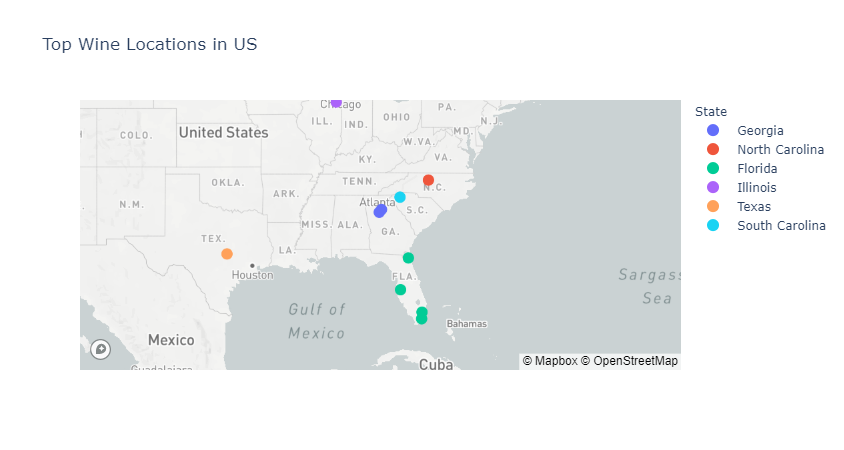

In [171]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    top_10_data,
    lat='Lat',
    lon='Lon',
    color='State',
    title='Top Wine Locations in US',
    color_continuous_scale=px.colors.sequential.Rainbow,
    size_max=50,
    zoom=3
)
map_plot.update_traces(marker={'size': 12})
map_plot.show()